# Pylabel End to End Example 
##  VOC XML to Coco JSON
Use this notebook to try out importing, analyzing, and exporting datasets of image annotations. 

In [1]:
#!pip install -i https://test.pypi.org/simple/ pylabelalphatest==0.1.1 

In [1]:
from pylabelalpha import importer

## Import VOC annotations 
First we will import annotations from the BCCD dataset, a small public dataset with images of blood cells (https://github.com/Shenggan/BCCD_Dataset).

In [7]:
#Download the annotations and images 
#!git clone https://github.com/Shenggan/BCCD_Dataset 
#path_to_annotations = "BCCD_Dataset/BCCD/Annotations/"

path_to_annotations = "/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations"
#Identify the path to get from the annotations to the images 
path_to_images = "../images/"

dataset = importer.ImportVOC(path=path_to_annotations, path_to_images=path_to_images, name="Wildlife")
dataset.df.head(2)


,id,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,...,ann_area,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split
0,0,../images/,8884354_2.jpeg,NaN,0,329,329,nan,,53.699216,...,2700.077176,NaN,NaN,nan,nan,nan,0,bear,NaN,
1,1,../images/,8884354_2.jpeg,NaN,0,329,329,nan,,197.545912,...,7184.099020,NaN,NaN,nan,nan,nan,0,bear,NaN,


/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/../images/2009703_1.jpeg


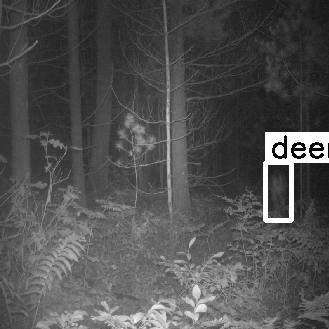

/Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/../images/5006610_0.jpeg


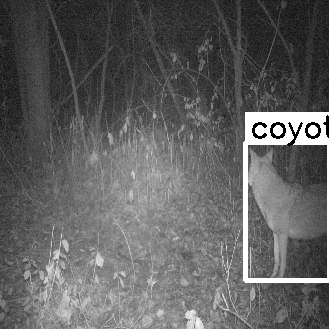

In [8]:
#Confirm that there are images by displaying an image
from IPython.display import display

display(dataset.visualize.ShowBoundingBoxes(dataset, 67))
display(dataset.visualize.ShowBoundingBoxes(dataset, "5006610_0.jpeg"))

## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [9]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 1918
Number of classes: 10
Classes:['bear' 'deer' 'coyote' 'opossum' 'elk' 'cottontail' 'racoon'
 'snowshoehare' 'foxred' 'foxgray']
Class counts:
deer            577
elk             296
opossum         265
racoon          198
snowshoehare    185
cottontail      162
coyote          156
foxgray         145
foxred           79
bear             57
Name: cat_name, dtype: int64


# Export to COCO JSON
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
All annotations will be stored in a single json file. 

In [10]:
dataset.export.ExportToCoco(dataset)

# Inspect one of the files
#!cat test_output/_000000000139_jpg.xml


Saved to: /Users/alex/Google Drive/pylabel/datasets/wildlife/yolo_splits/val/labels/../voc_annotations/Wildlife.json


<?xml version="1.0" ?>
<annotation>
	<filename>000000000139.jpg</filename>
	<size>
		<width>640</width>
		<height>426</height>
		<depth/>
	</size>
	<object>
		<name>potted plant</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>236.98</xmin>
			<xmax>261.68</xmax>
			<ymin>73.00999999999999</ymin>
			<ymax>142.51</ymax>
		</bndbox>
	</object>
	<object>
		<name>tv</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>7.03</xmin>
			<xmax>156.35</xmax>
			<ymin>72.88999999999999</ymin>
			<ymax>167.76</ymax>
		</bndbox>
	</object>
	<object>
		<name>tv</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>557.21</xmin>
			<xmax>638.5600000000001</xmax>
			<ymin>130.45999999999998</ymin>
			<ymax>209.19</ymax>
		</bndbox>
	</object>
	<object>
		<name>chair</name>
		<pose/>
		<truncated/>
		<difficult/>
		<bndbox>
			<xmin>358.98</xmin>
			<xmax>414.98</xmax>
			<ymin>115.22000000000001</ymin>
			<ymax>218.05</ymax>
		</bndbox>
	</object>
	<object>